In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns


In [27]:
sales_data = pd.read_csv('../../Data/supermarket/supermarket_sales.csv')

In [30]:
sales_data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [33]:
# Selecionando colunas relevantes para o clustering
selected_columns = ['Gender', 'Customer type', 'Product line', 'Total', 'Payment', 'Rating']

# Filtrando o dataset
filtered_data = sales_data[selected_columns]

# Convertendo variáveis categóricas em numéricas com one-hot encoding
data_encoded = pd.get_dummies(filtered_data, columns=['Gender', 'Customer type', 'Product line', 'Payment'])

# Normalizando as variáveis numéricas ('Total' e 'Rating')
scaler = StandardScaler()
data_encoded[['Total', 'Rating']] = scaler.fit_transform(data_encoded[['Total', 'Rating']])

# Visualizando as primeiras linhas dos dados codificados e normalizados
data_encoded.head()


,Total,Rating,Gender_Female,Gender_Male,Customer type_Member,Customer type_Normal,Product line_Electronic accessories,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Cash,Payment_Credit card,Payment_Ewallet
0,0.919607,1.238443,1,0,1,0,0,0,0,1,0,0,0,0,1
1,-0.987730,1.529527,1,0,0,1,1,0,0,0,0,0,1,0,0
2,0.071446,0.248760,0,1,0,1,0,0,0,0,1,0,0,1,0
3,0.675780,0.830927,0,1,1,0,0,0,0,1,0,0,0,0,1
4,1.267125,-0.973790,0,1,0,1,0,0,0,0,0,1,0,0,1


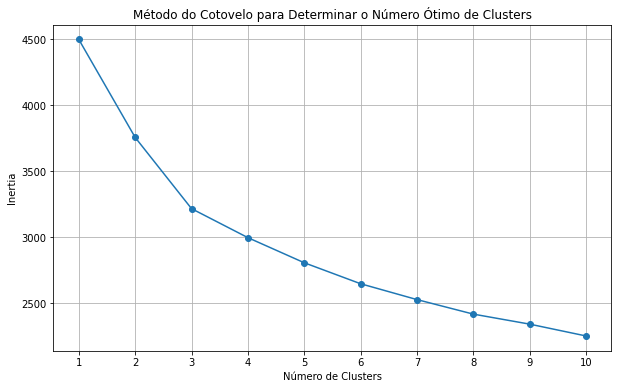

In [34]:
# Aplicando o método do cotovelo para encontrar o número ótimo de clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_encoded)
    inertia.append(kmeans.inertia_)

# Plotando o método do cotovelo
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método do Cotovelo para Determinar o Número Ótimo de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


In [35]:
# Aplicando o método k-means para os dados do conjunto de dados
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(data_encoded)


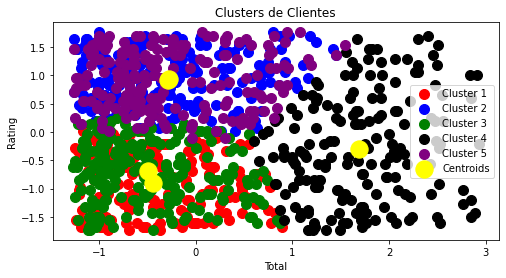

In [38]:
#Plotando os clusters
plt.figure(figsize=(8, 4))
plt.scatter(data_encoded.iloc[pred_y == 0, 0], data_encoded.iloc[pred_y == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(data_encoded.iloc[pred_y == 1, 0], data_encoded.iloc[pred_y == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(data_encoded.iloc[pred_y == 2, 0], data_encoded.iloc[pred_y == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(data_encoded.iloc[pred_y == 3, 0], data_encoded.iloc[pred_y == 3, 1], s=100, c='black', label='Cluster 4')
plt.scatter(data_encoded.iloc[pred_y == 4, 0], data_encoded.iloc[pred_y == 4, 1], s=100, c='purple', label='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters de Clientes')
plt.xlabel('Total')
plt.ylabel('Rating')
plt.legend()
plt.show()

In [40]:
sales_data['Cluster'] = kmeans.labels_
cluster_distribution = sales_data['Cluster'].value_counts().sort_index()

# Exibindo a distribuição dos clusters
cluster_distribution


0    184
1    201
2    229
3    181
4    205
Name: Cluster, dtype: int64

In [41]:
# Calculando estatísticas descritivas para cada cluster
cluster_stats = sales_data.groupby('Cluster')[['Total', 'Rating']].describe()
cluster_stats


Total                                                           \
         count        mean         std       min         25%        50%   
Cluster                                                                   
0        184.0  214.196291  140.587753   16.1070   89.263125  188.20725   
1        201.0  255.633104  164.540164   13.1670  118.902000  228.12300   
2        229.0  202.500157  133.570053   10.6785   90.825000  176.92500   
3        181.0  739.393061  134.861538  470.6730  628.929000  734.07600   
4        205.0  253.510720  160.240907   12.6945  135.576000  210.96600   

                              Rating                                          \
                75%       max  count      mean       std  min  25%  50%  75%   
Cluster                                                                        
0        324.562875   543.753  184.0  5.417391  0.899375  4.0  4.6  5.4  6.3   
1        383.523000   680.610  201.0  8.587065  0.830682  7.0  7.9  8.6  9.3   
2        288.204000   536.991  229.0  5.794760  0.911798  4.0  5.1  5.9  6.6   
3        830.371500  1042.650  181.0  6.455249  1.618071  4.0  5.1  6.3  7.6   
4        384.720000   702.219  205.0  8.558537  0.866075  6.8  7.8  8.6  9.3   

               
          max  
Cluster        
0         7.0  
1        10.0  
2         7.4  
3         9.9  
4        10.0

In [43]:
# Análise de Frequência para Variáveis Categóricas: Para variáveis categóricas (como Gender, Customer type, Product line, Payment), você pode analisar a frequência de cada categoria dentro dos clusters para identificar padrões específicos. Por exemplo, um cluster pode ter uma proporção maior de compras de uma linha de produtos específica ou uma predominância de um gênero.

categorical_vars = ['Gender', 'Customer type', 'Product line', 'Payment']

# Criando um dicionário para armazenar os resultados
cluster_category_frequencies = {}

for var in categorical_vars:
    # Agrupando os dados por 'Cluster' e então pela variável categórica, contando o número de ocorrências
    frequency = sales_data.groupby(['Cluster', var]).size().unstack(fill_value=0)
    # Salvando o resultado no dicionário
    cluster_category_frequencies[var] = frequency

# Agora, você pode acessar a frequência de cada variável categórica dentro dos clusters como segue
# Por exemplo, para 'Gender'
print(cluster_category_frequencies['Gender'])

# Repita para outras variáveis categóricas conforme necessário


Gender   Female  Male
Cluster              
0           184     0
1           108    93
2             0   229
3            98    83
4           111    94


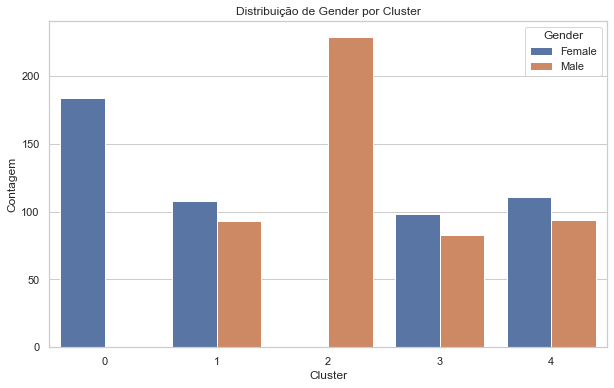

In [46]:
# Definindo o estilo do gráfico
sns.set(style="whitegrid")

# Criando um gráfico de barras para visualizar a distribuição de Gender por Cluster
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', hue='Gender', data=sales_data)
plt.title('Distribuição de Gender por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Contagem')
plt.legend(title='Gender')
plt.show()


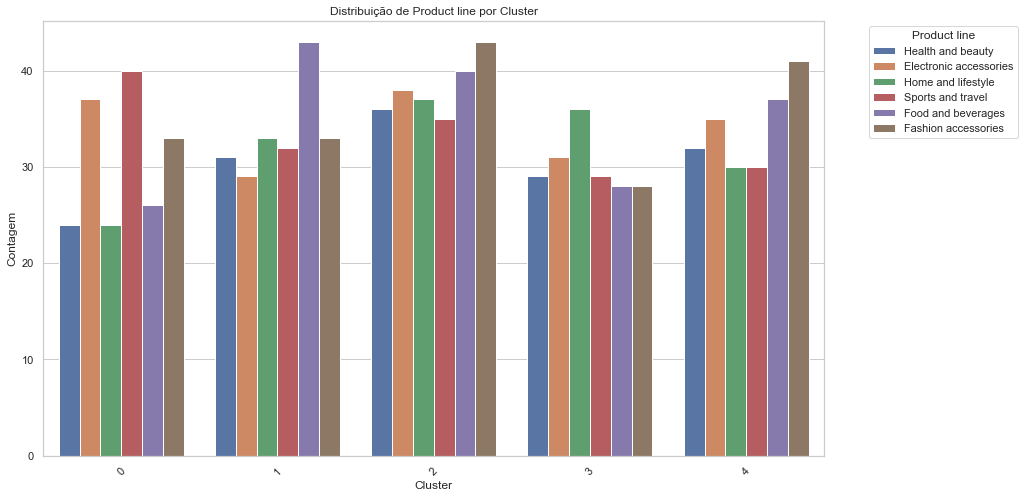

In [47]:
plt.figure(figsize=(14, 8))
sns.countplot(x='Cluster', hue='Product line', data=sales_data)
plt.title('Distribuição de Product line por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Contagem')
plt.legend(title='Product line', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45) # Isso ajuda a evitar que os rótulos no eixo X se sobreponham
plt.show()


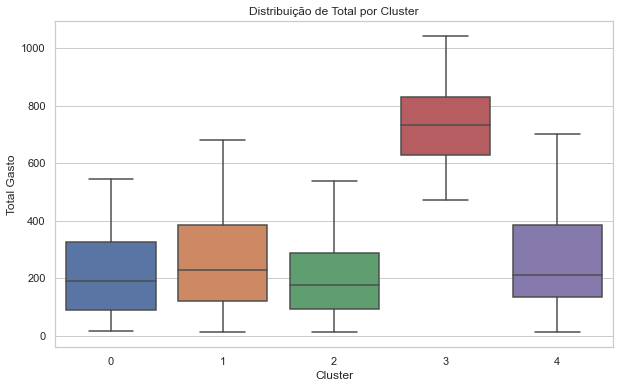

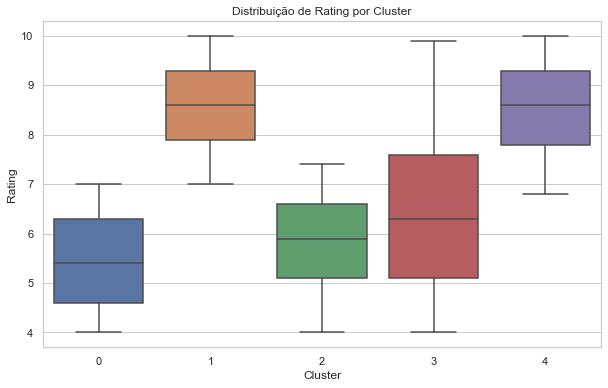

In [48]:
# Visualizando a distribuição de 'Total' por Cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Total', data=sales_data)
plt.title('Distribuição de Total por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Total Gasto')
plt.show()

# Visualizando a distribuição de 'Rating' por Cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Rating', data=sales_data)
plt.title('Distribuição de Rating por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Rating')
plt.show()


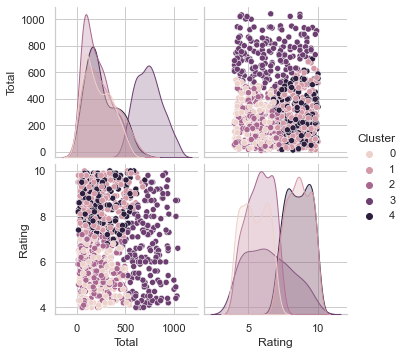

In [49]:
# Selecionando um subconjunto de variáveis numéricas para visualização
num_vars = ['Total', 'Rating']
data_for_pairplot = sales_data[num_vars + ['Cluster']]

# Criando o pairplot colorido por 'Cluster'
sns.pairplot(data_for_pairplot, hue='Cluster')
plt.show()


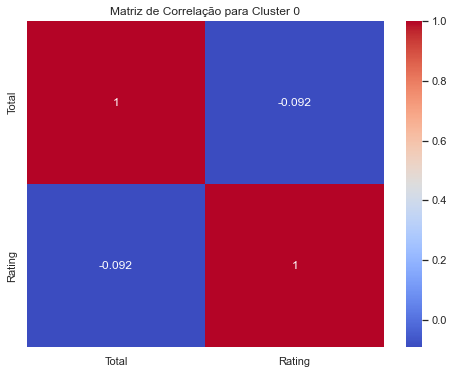

In [50]:
# Exemplo para o cluster 0
cluster_data = sales_data[sales_data['Cluster'] == 0]
corr_matrix = cluster_data[num_vars].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação para Cluster 0')
plt.show()


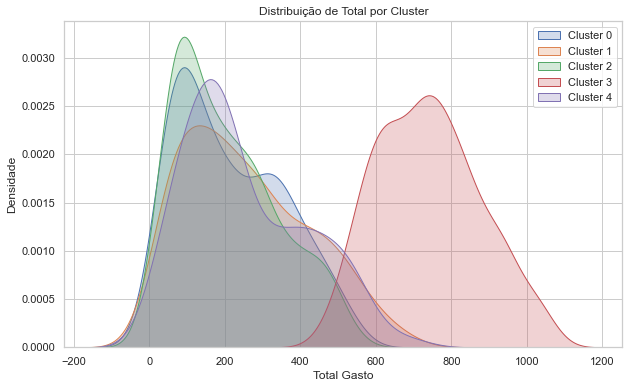

In [51]:
plt.figure(figsize=(10, 6))
for cluster in sorted(sales_data['Cluster'].unique()):
    subset = sales_data[sales_data['Cluster'] == cluster]
    sns.kdeplot(subset['Total'], label=f'Cluster {cluster}', shade=True)
plt.title('Distribuição de Total por Cluster')
plt.xlabel('Total Gasto')
plt.ylabel('Densidade')
plt.legend()
plt.show()


## Analisando o cluster 3

In [53]:
# Filtrando dados para Cluster 3
cluster_3_data = sales_data[sales_data['Cluster'] == 3]

# Análise descritiva básica para variáveis numéricas
desc_stats = cluster_3_data.describe()

# Contagem de categorias para variáveis categóricas
category_counts = cluster_3_data.select_dtypes(include=['object', 'category']).apply(pd.Series.value_counts)

print("Descrição Estatística de Variáveis Numéricas:\n", desc_stats)


Descrição Estatística de Variáveis Numéricas:
        Unit price    Quantity      Tax 5%        Total        cogs  \
count  181.000000  181.000000  181.000000   181.000000  181.000000   
mean    82.709503    8.596685   35.209193   739.393061  704.183867   
std     12.621463    1.365361    6.421978   134.861538  128.439560   
min     51.940000    5.000000   22.413000   470.673000  448.260000   
25%     73.560000    8.000000   29.949000   628.929000  598.980000   
50%     83.770000    9.000000   34.956000   734.076000  699.120000   
75%     93.880000   10.000000   39.541500   830.371500  790.830000   
max     99.960000   10.000000   49.650000  1042.650000  993.000000   

       gross margin percentage  gross income      Rating  Cluster  
count             1.810000e+02    181.000000  181.000000    181.0  
mean              4.761905e+00     35.209193    6.455249      3.0  
std               8.906422e-16      6.421978    1.618071      0.0  
min               4.761905e+00     22.413000    4.

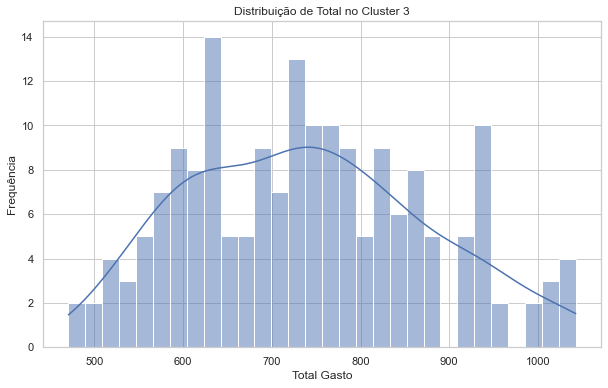

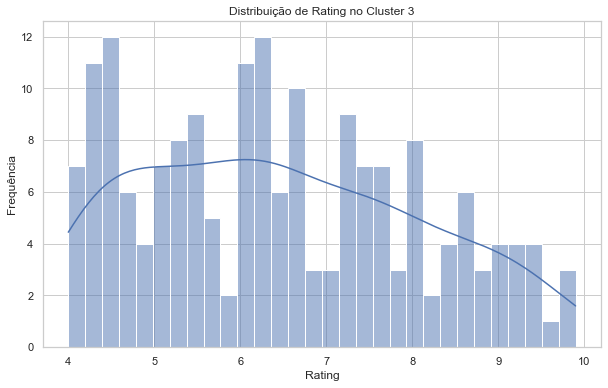

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribuição de 'Total'
plt.figure(figsize=(10, 6))
sns.histplot(cluster_3_data['Total'], bins=30, kde=True)
plt.title('Distribuição de Total no Cluster 3')
plt.xlabel('Total Gasto')
plt.ylabel('Frequência')
plt.show()

# Distribuição de 'Rating'
plt.figure(figsize=(10, 6))
sns.histplot(cluster_3_data['Rating'], bins=30, kde=True)
plt.title('Distribuição de Rating no Cluster 3')
plt.xlabel('Rating')
plt.ylabel('Frequência')
plt.show()


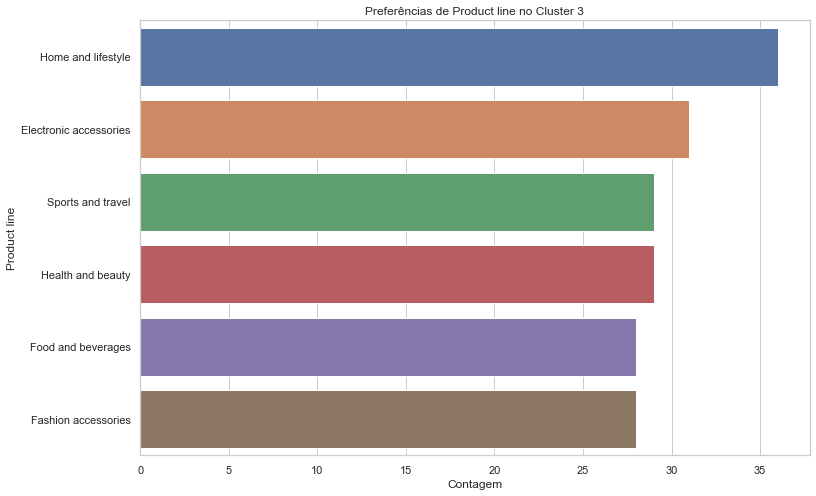

In [56]:
plt.figure(figsize=(12, 8))
sns.countplot(y='Product line', data=cluster_3_data, order=cluster_3_data['Product line'].value_counts().index)
plt.title('Preferências de Product line no Cluster 3')
plt.xlabel('Contagem')
plt.ylabel('Product line')
plt.show()


C:\Users\Pichau\AppData\Local\Temp\ipykernel_15144\1225794925.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix_cluster_3 = cluster_3_data.corr()


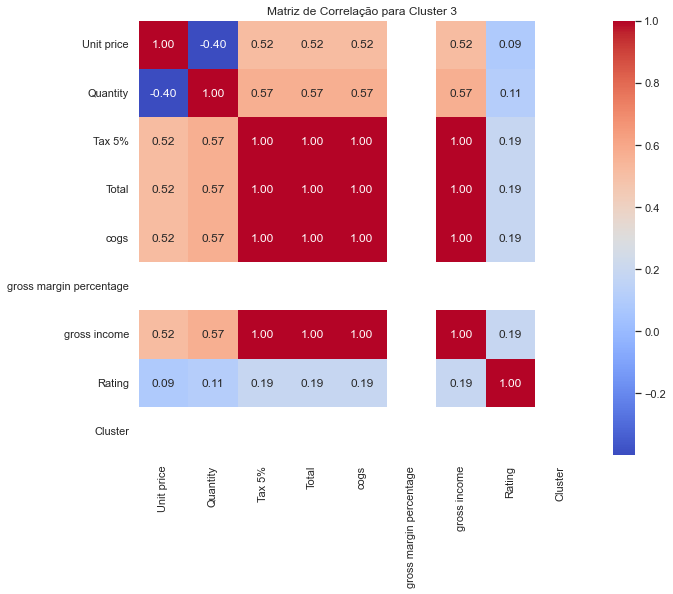

In [57]:
# Matriz de correlação
corr_matrix_cluster_3 = cluster_3_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_cluster_3, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação para Cluster 3')
plt.show()
